In [48]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib as mpl

sns.set()
%matplotlib inline

In [3]:
data = np.load('clustering.npz')
print(data['X'].shape)
X = data['X']

(302, 728)


In [4]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

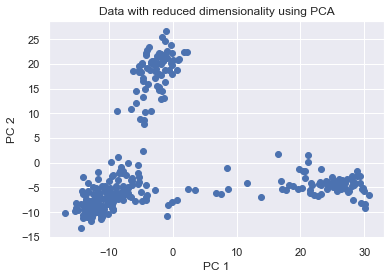

In [5]:
plt.scatter(X_red[:, 0], X_red[:, 1])
plt.title('Data with reduced dimensionality using PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('ex2pca', dpi=200)

In [106]:
X_df.corr().iloc[:100, :100]

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 91,Var 92,Var 93,Var 94,Var 95,Var 96,Var 97,Var 98,Var 99,Var 100
Var 1,1.000000,0.014038,-0.000802,-0.217297,0.560234,0.112541,0.186274,0.090186,-0.092517,0.025505,...,-0.210373,-0.036118,-0.061771,-0.224118,0.420700,-0.139331,-0.222315,-0.142421,-0.014071,-0.088276
Var 2,0.014038,1.000000,0.168262,-0.079206,-0.200190,0.301993,0.135201,-0.040332,0.225657,0.006222,...,-0.195436,0.214821,-0.345187,-0.023943,0.263631,-0.009906,-0.235435,-0.058553,0.093199,-0.418731
Var 3,-0.000802,0.168262,1.000000,-0.272713,0.042547,0.447156,-0.146398,-0.065868,0.518520,-0.176099,...,0.341095,0.161775,0.114412,-0.106016,0.132376,-0.044930,-0.069902,0.507934,0.524068,0.057803
Var 4,-0.217297,-0.079206,-0.272713,1.000000,-0.116550,-0.134942,0.027642,-0.023591,-0.141959,0.276655,...,-0.118221,-0.248374,-0.139348,-0.038167,-0.264622,0.055181,0.314193,-0.175803,-0.092040,-0.123520
Var 5,0.560234,-0.200190,0.042547,-0.116550,1.000000,-0.048175,0.153570,0.070372,-0.086783,0.154560,...,-0.079915,-0.017081,0.092065,-0.313626,0.255701,-0.134479,-0.022029,-0.214000,-0.066623,0.253988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Var 96,-0.139331,-0.009906,-0.044930,0.055181,-0.134479,0.086013,-0.049379,-0.009696,0.016094,-0.057885,...,0.169728,-0.032093,0.096540,0.073130,-0.120154,1.000000,-0.016820,-0.053268,-0.076098,0.066291
Var 97,-0.222315,-0.235435,-0.069902,0.314193,-0.022029,-0.248905,-0.170603,-0.032600,0.013737,0.140420,...,-0.033702,-0.178584,-0.057498,-0.126974,-0.182469,-0.016820,1.000000,0.052843,0.103792,0.083497
Var 98,-0.142421,-0.058553,0.507934,-0.175803,-0.214000,0.137132,-0.331943,-0.076410,0.257841,-0.293027,...,0.303943,0.153985,0.169972,-0.052109,0.049173,-0.053268,0.052843,1.000000,0.436738,0.119732
Var 99,-0.014071,0.093199,0.524068,-0.092040,-0.066623,0.391241,-0.297986,-0.005631,0.339241,-0.187042,...,0.086394,-0.053010,-0.044387,-0.268656,0.200326,-0.076098,0.103792,0.436738,1.000000,-0.097474


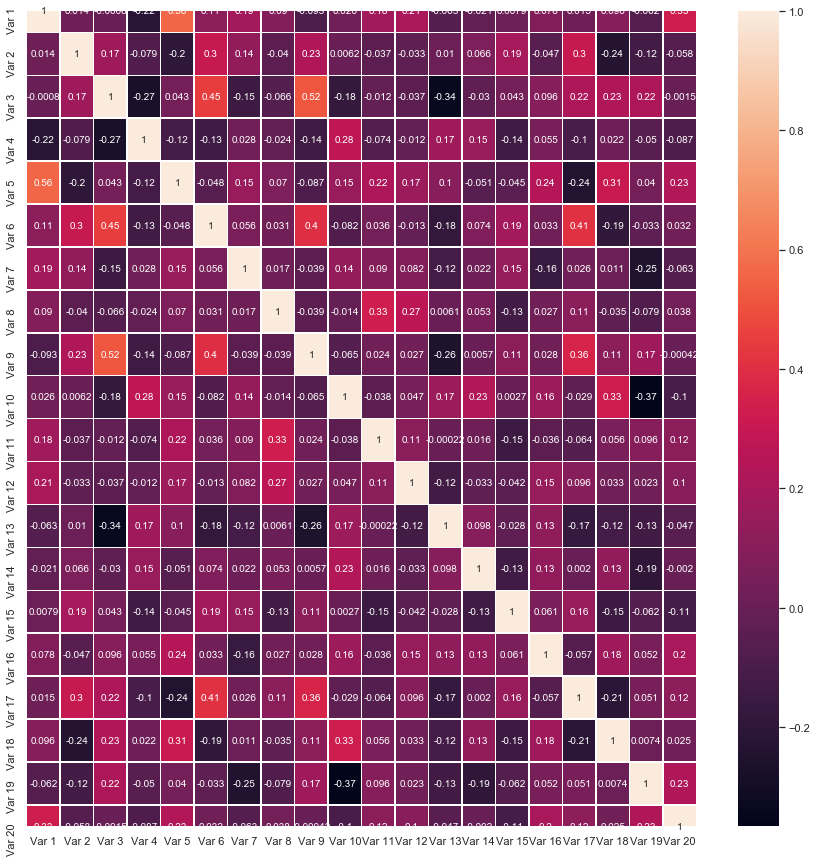

In [115]:
feature_names = np.core.defchararray.add('Var ', np.arange(1, X.shape[1]+1).astype(str))
X_df = pd.DataFrame(X, columns=feature_names)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(X_df.corr().iloc[:20, :20], linewidths=0.5, annot=True, ax=ax)
fig.savefig('corr fist 30', dpi=400)

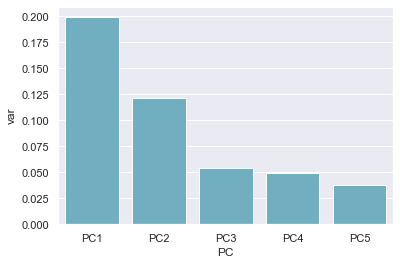

In [16]:
pca_5 = PCA(n_components = 5).fit(X)
scree = pd.DataFrame({'var':pca_5.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']})
sns.barplot(x='PC',y="var", 
           data=scree, color="c");
plt.savefig('Scree ex2')

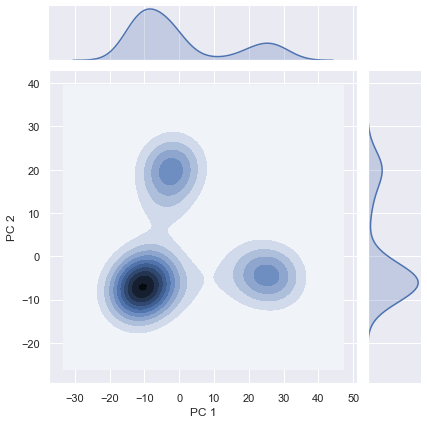

In [10]:
pca_df = pd.DataFrame(data=X_red, columns=['PC 1', 'PC 2'])

g_jointplot = sns.jointplot(x="PC 1", y="PC 2", data=pca_df, kind="kde");
g_jointplot.savefig('jointplot_pca', dpi=200)

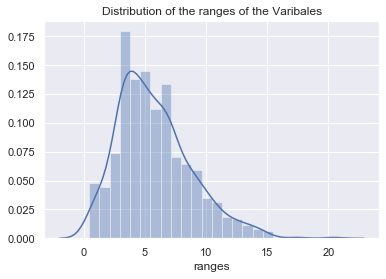

In [17]:
variable_ranges = [abs(max(X[:,i]) - min(X[:, i])) for i in range(X.shape[1])]
var_ranges_series = pd.Series(variable_ranges)
g_hist_varranges = sns.distplot(var_ranges_series)
g_hist_varranges.set_xlabel('ranges')
g_hist_varranges.set_title('Distribution of the ranges of the Varibales')
plt.savefig('ex2varranges', dpi=200)

<BarContainer object of 6 artists>

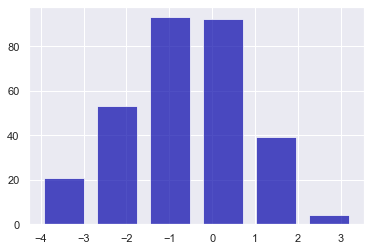

In [18]:
hist, bin_edges = np.histogram(X[:,0], 6)
plt.bar(bin_edges[:-1], hist, width=variable_ranges[0]/8, color='#0504aa',alpha=0.7)


In [19]:
pca_allcomponents = PCA()
pca_allcomponents.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
covariance_matrix = pca.get_covariance()

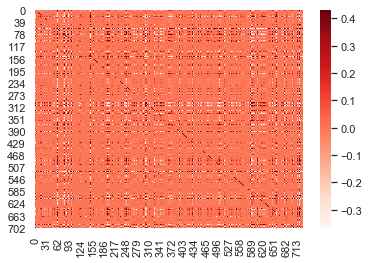

In [19]:
sns.heatmap(covariance_matrix, robust=True, cmap='Reds')
plt.savefig('covariance heatmap', dpi=400)

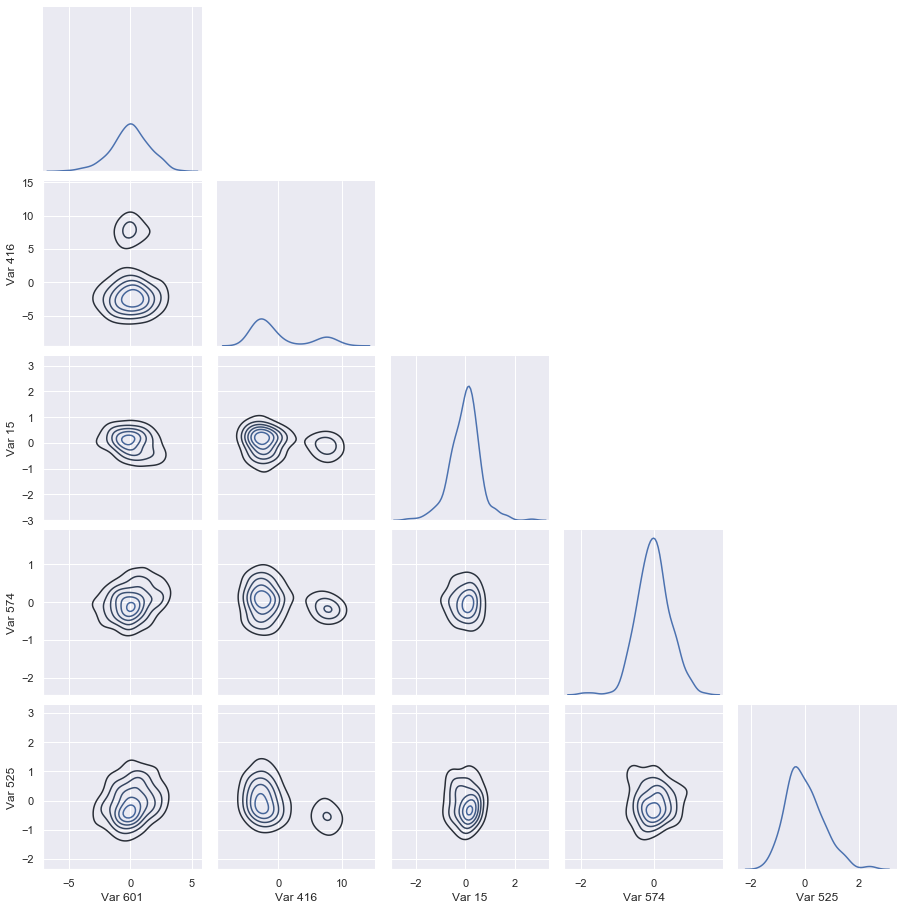

In [144]:
selected_features = X_df[[feature_names[np.random.randint(1,729)] for _ in range(5)]]
g = sns.PairGrid(selected_features, corner=True)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);
g.savefig('cluster variable ex2')

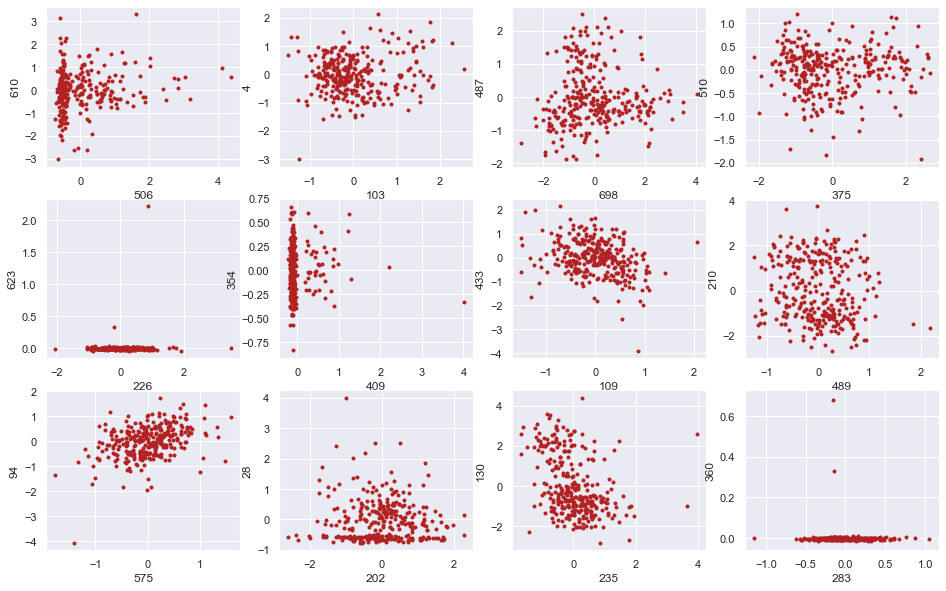

In [148]:
fig = plt.figure(figsize = (16, 10))
fig.tight_layout()
for i in range(12):
    rand1 = np.random.randint(0, len(X[0]))
    rand2 = np.random.randint(0, len(X[0]))
    ax = fig.add_subplot(3, 4, i+1)
    ax.scatter(X[:, rand1], X[:, rand2], marker='.', c='firebrick')
    ax.set_xlabel(str(rand1))
    ax.set_ylabel(str(rand2))  
plt.savefig('Some random features')
plt.show()

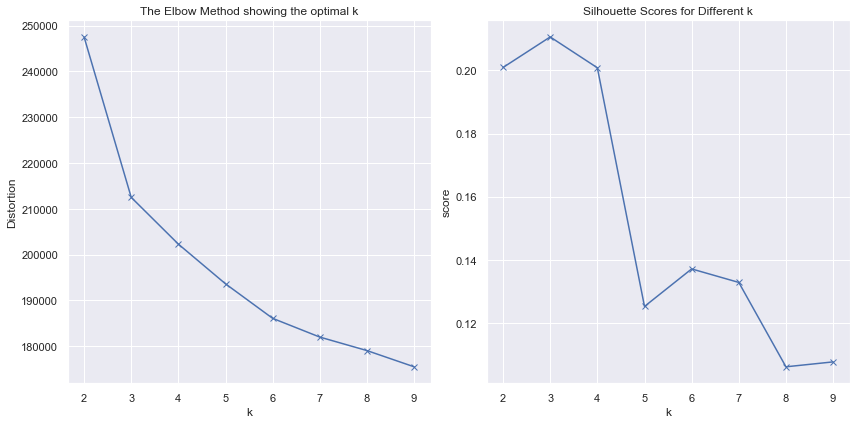

In [118]:
distortions = []
silhouette_scores = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X, kmeanModel.predict(X)))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2 = fig.add_subplot(122)
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('score')
ax2.set_title('Silhouette Scores for Different k')
fig.tight_layout()
fig.savefig('Elbow Ex2')


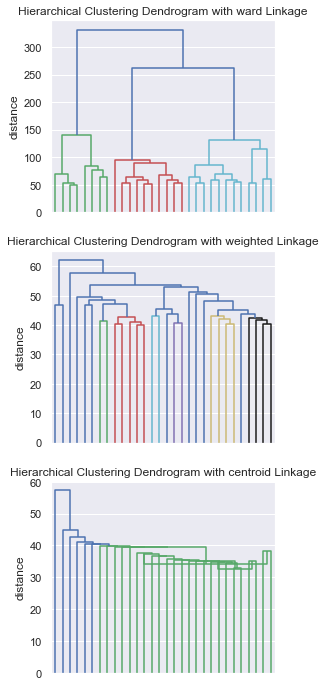

In [163]:
fig = plt.figure(figsize=(4,12))
fig.tight_layout()
for i, link in enumerate(['ward', 'weighted', 'centroid']):
    Z = linkage(X, link)
    # calculate full dendrogram
    ax = fig.add_subplot(3,1,i+1)
    ax.set_title('Hierarchical Clustering Dendrogram with %s Linkage' % link)
    ax.set_ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        no_labels=True, truncate_mode='lastp')
fig.savefig('dendrograms')

In [21]:
# In this case the clusters seem to be convex so a clustering algorithm is chosen accordingly
final_kmean = KMeans(n_clusters=3, tol=1e-6, max_iter=500)
final_kmean.fit(X)
kmean_labels = final_kmean.labels_

# Find the points in each cluster
cluster_1 = np.where(kmean_labels==0)
cluster_2 = np.where(kmean_labels==1)
cluster_3 = np.where(kmean_labels==2)
print('Cluster 1 has {} points; \n\
Cluster 2 has {} points; \n\
Cluster 3 has {} points;'.format(cluster_1[0].size, cluster_2[0].size, cluster_3[0].size))

Cluster 1 has 155 points; 
Cluster 2 has 74 points; 
Cluster 3 has 73 points;


In [84]:
# Now perform the clustering on the data with reduced dimensionalit
final_kmean_reduced  = KMeans(n_clusters=3, tol=1e-6, max_iter=500).fit(X_red)
kmean_labels_red = final_kmean_reduced.labels_

cluster_1_red = np.where(kmean_labels_red==0)
cluster_2_red = np.where(kmean_labels_red==1)
cluster_3_red = np.where(kmean_labels_red==2)

print('Cluster 1 has {} points; \n\
Cluster 2 has {} points; \n\
Cluster 3 has {} points;'.format(cluster_1_red[0].size, cluster_2_red[0].size, cluster_3_red[0].size))

Cluster 1 has 156 points; 
Cluster 2 has 74 points; 
Cluster 3 has 72 points;


In [164]:
print('Cluster 1 on reduced data and actual data share {:.2%} of points;\n\
Cluster 2 on reduced data and actual data share {:.2%} of points;\n\
Cluster 3 on reduced data and actual data share {:.2%} of points'. \
      format(len(np.intersect1d(cluster_1, cluster_1_red))/156, len(np.intersect1d(cluster_2, cluster_2_red))/74,
      len(np.intersect1d(cluster_3, cluster_3_red))/74))

Cluster 1 on reduced data and actual data share 99.36% of points;
Cluster 2 on reduced data and actual data share 100.00% of points;
Cluster 3 on reduced data and actual data share 97.30% of points


In [199]:
X_important = X[:, [231, 318, 530, 676, 719]]
kmean_important = KMeans(n_clusters=3, tol=1e-6, max_iter=500).fit(X_important)
kmean_labels_imp = kmean_important.labels_
cluster_1_imp = np.where(kmean_labels_imp==0)
cluster_2_imp = np.where(kmean_labels_imp==1)
cluster_3_imp = np.where(kmean_labels_imp==2)
print('Cluster 1 has {} points; \n\
Cluster 2 has {} points; \n\
Cluster 3 has {} points;'.format(cluster_1_imp[0].size, cluster_2_imp[0].size, cluster_3_imp[0].size))

Cluster 1 has 152 points; 
Cluster 2 has 77 points; 
Cluster 3 has 73 points;


In [201]:
print('Cluster 1 on reduced data and actual data share {:.2%} of points;\n\
Cluster 2 on reduced data and actual data share {:.2%} of points;\n\
Cluster 3 on reduced data and actual data share {:.2%} of points'. \
      format(len(np.intersect1d(cluster_1, cluster_1_imp))/155, len(np.intersect1d(cluster_3, cluster_2_imp))/77,
      len(np.intersect1d(cluster_3, cluster_2_imp))/73))

Cluster 1 on reduced data and actual data share 97.42% of points;
Cluster 2 on reduced data and actual data share 93.51% of points;
Cluster 3 on reduced data and actual data share 98.63% of points


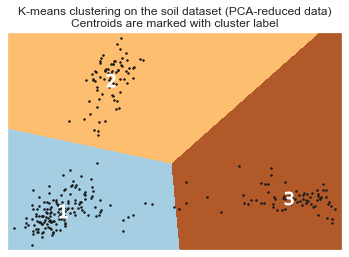

In [174]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_red[:, 0].min() - 1, X_red[:, 0].max() + 1
y_min, y_max = X_red[:, 1].min() - 1, X_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = final_kmean_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_red[:, 0], X_red[:, 1], 'k.', markersize=3)
# Plot the centroids as a white X
centroids = final_kmean_reduced.cluster_centers_
for i, num in enumerate(['$1$', '$2$', '$3$']):
    plt.scatter(centroids[i, 0], centroids[i, 1],
                marker=num, s=169, linewidths=1,
                color='w', zorder=10)
plt.title('K-means clustering on the soil dataset (PCA-reduced data)\n'
          'Centroids are marked with cluster label')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('kmeans pca', dpi=200)
plt.show()


In [248]:
negative_components_pc1 = pca.components_[0][pca.components_[0] < 0]
negative_components_pc2 = pca.components_[1][pca.components_[1] < 0]


[0.4875891  0.32374673 0.31344952 0.29566248 0.26750239]
[676  61 402 415 492]


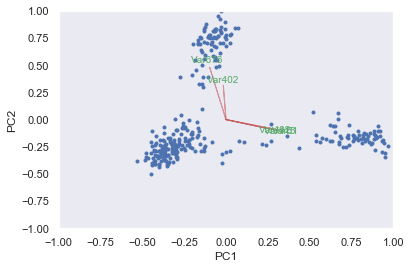

In [88]:
pca_norms = np.linalg.norm(pca.components_, axis = 0)
sorted_pca = -np.sort(-pca_norms)
sorted_pca_5 = sorted_pca[:5]
print(sorted_pca_5)
top5 = np.zeros(5, dtype=int)
for i in range(5):
    top5[i] = int(np.where(pca_norms==sorted_pca_5[i])[0])

xs = X_red[:, 0]
ys = X_red[:, 1]
scalex = 1.5/(xs.max() - xs.min())
scaley = 1.5/(ys.max() - ys.min())
plt.scatter(xs * scalex,ys * scaley, marker='.')
for i in range(5):
    plt.arrow(0.0, 0.0, pca.components_[0,top5[i]], pca.components_[1,top5[i]], color = 'r', alpha = 0.5)
    plt.text(pca.components_[0,top5[i]]* 1.15, pca.components_[1,top5[i]] * 1.15, 
             "Var"+str(top5[i]), color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.savefig('important features')
print(top5)

[array([136, 645, 391, 668, 717]), array([432, 676, 522, 242, 645]), array([ 85, 492, 552, 717,  61])]


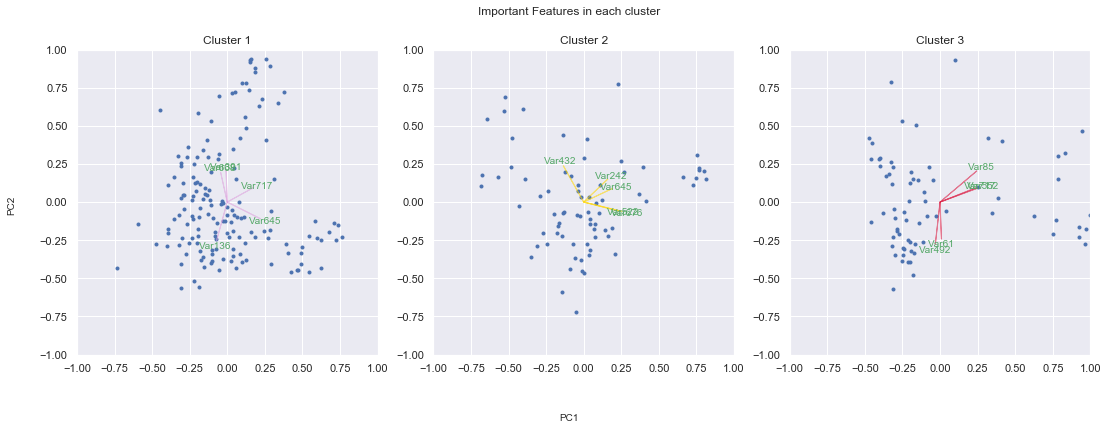

In [89]:
cluster1 = np.where(final_kmean_reduced.labels_ == 0)[0]
cluster2 = np.where(final_kmean_reduced.labels_ == 1)[0]
cluster3 = np.where(final_kmean_reduced.labels_ == 2)[0]
clusters = [cluster1, cluster2, cluster3]
pca_clusters = [PCA(n_components=2).fit(X[cl]) for cl in clusters]
pca_cl_points = [PCA(n_components=2).fit_transform(X[cl]) for cl in clusters]
pca_cl_norms = [np.linalg.norm(pca_clusters[i].components_, axis = 0)for i in range(3)]
top5_cls = [-np.sort(-pca_cl_norms[i])[:5] for i in range(3)]
top5_cls_index = [np.zeros(5, dtype=int) for _ in range(3)]

fig = plt.figure(figsize=(15,5))
colors = ['plum', 'gold', 'crimson']
for i in range(3):
    xs = pca_cl_points[i][:, 0]
    ys = pca_cl_points[i][:, 1]
    scalex = 1.5/(xs.max() - xs.min())
    scaley = 1.5/(ys.max() - ys.min())
    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(xs * scalex,ys * scaley, marker='.')
    for j in range(5):
        top5_cls_index[i][j] = int(np.where(pca_cl_norms[i]==top5_cls[i][j])[0])
        ax.arrow(0.0, 0.0, pca_clusters[i].components_[0,top5_cls_index[i][j]], 
                  pca_clusters[i].components_[1,top5_cls_index[i][j]], color = colors[i], alpha = 0.5)
        ax.text(pca_clusters[i].components_[0,top5_cls_index[i][j]] * 1.15, 
                 pca_clusters[i].components_[1,top5_cls_index[i][j]] * 1.15, 
                 "Var"+str(top5_cls_index[i][j]), color = 'g', ha = 'center', va = 'center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_title('Cluster %d' %(i+1))
plt.suptitle('Important Features in each cluster', y=1.05)
fig.text(0.5, -0.1, 'PC1', ha='center')
fig.text(-0.02, 0.5, 'PC2', va='center', rotation='vertical')
plt.tight_layout()
plt.grid(True)
plt.savefig('important features', dpi=300)

print(top5_cls_index)

In [54]:
y = kmean_labels
cluster1_2 = np.where(kmean_labels != 2)[0]
cluster1_3 = np.where(kmean_labels != 1)[0]
cluster2_3 = np.where(kmean_labels != 0)[0]
y_12 = kmean_labels[cluster1_2]
y_13 = kmean_labels[cluster1_3]
y_23 = kmean_labels[cluster2_3]

estimator = LogisticRegressionCV(cv=10).fit(X[cluster1_2], y_12)
print(estimator.C_)

X_12 = X[cluster1_2]

X_12_train = X_12[:110]
y_12_train = y_12[:110]
X_12_valid = X_12[110:]
y_12_valid = y_12[110:]

best_lasso = LogisticRegression(C=0.00077426)

# fit(X_12_train, y_12_train)
# y_hat = best_lasso.predict(X_12_valid)
# metrics.accuracy_score(y_12_valid, y_hat)

[0.00077426]


0.9915966386554622

In [55]:
selector = RFECV(best_lasso, min_features_to_select=5, cv=10, scoring='accuracy').fit(X[cluster1_2], y_12)


In [64]:
estimator_13 = LogisticRegressionCV(cv=10).fit(X[cluster1_3], y_13)
estimator_23 = LogisticRegressionCV(cv=10).fit(X[cluster2_3], y_23)
print(estimator_13.C_, estimator_23.C_)
print(estimator_13.scores_, estimator_23.scores_)
bestl2_13 = LogisticRegression(C=estimator_13.C_[0])
bestl2_23 = LogisticRegression(C=estimator_23.C_[0])

[0.00599484] [0.0001]
{2: array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.95652174, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.95652174, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.     

In [179]:
selector_13 = RFECV(bestl2_13, min_features_to_select=5, cv=10, scoring='accuracy').fit(X[cluster1_3], y_13)
selector_23 = RFECV(bestl2_23, min_features_to_select=20, cv=10, scoring='accuracy').fit(X[cluster2_3], y_23)

In [180]:
ranks_12 = np.where(selector.ranking_ == 1)[0]
ranks_13 = np.where(selector_13.ranking_ == 1)[0]
ranks_23 = np.where(selector_23.ranking_ == 1)[0]
print(ranks_12)
print(ranks_13)
print(ranks_23)
top5_1 = np.intersect1d(ranks_12, ranks_13)
top5_2 = np.intersect1d(ranks_12, ranks_23)
top5_3 = np.intersect1d(ranks_13, ranks_23)
print(top5_1, top5_2, top5_3)

[  1  21 123 135 136 151 197 198 204 231 249 294 300 318 325 402 500 522
 530 544 547 552 557 609 615 676 713 719]
[ 21  22  49  61  68  80  85  88  92  99 130 135 136 157 197 198 206 210
 231 249 294 299 300 309 318 320 325 335 356 370 375 393 411 415 421 428
 440 492 500 501 522 530 533 547 562 565 586 588 603 608 609 633 668 676
 693 700 709 713 719 725]
[ 22  61  80  85 151 206 231 299 318 402 415 492 530 544 557 565 656 676
 719 725]
[ 21 135 136 197 198 231 249 294 300 318 325 500 522 530 547 609 676 713
 719] [151 231 318 402 530 544 557 676 719] [ 22  61  80  85 206 231 299 318 415 492 530 565 676 719 725]


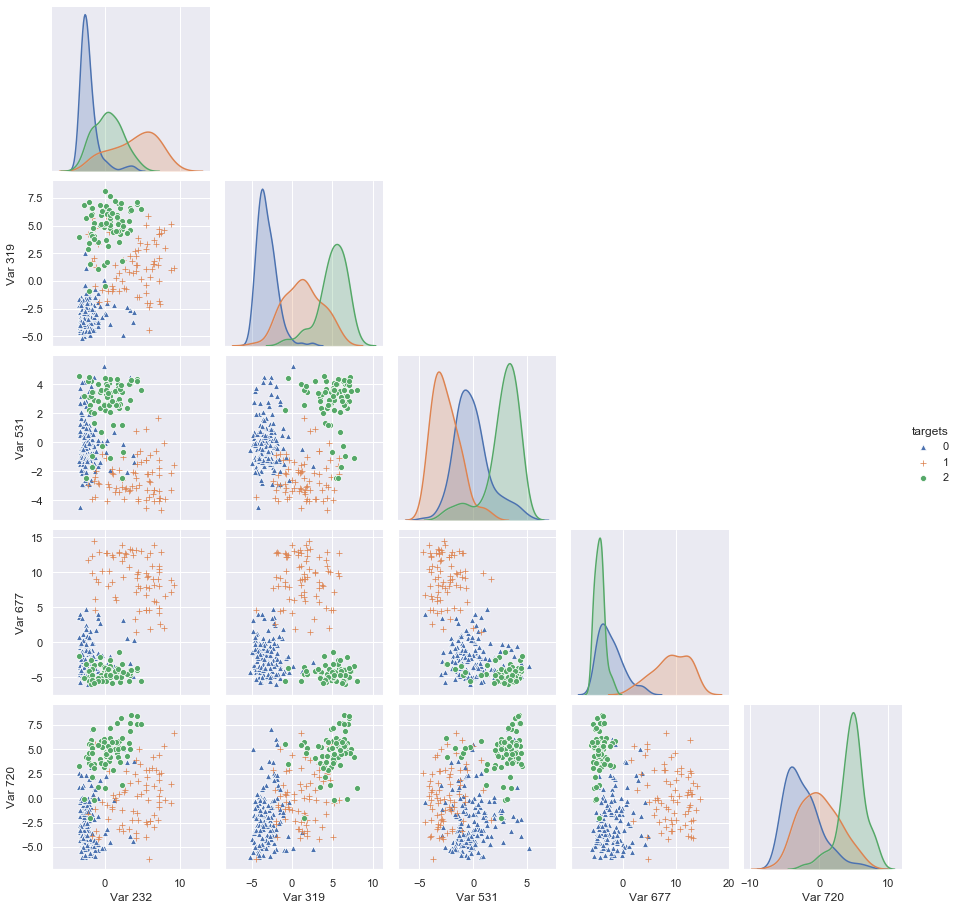

In [188]:
top5_features = X_df.iloc[:, [231, 318, 530, 676, 719]] 
top5_features.insert(5, 'targets', kmean_labels)
sns.pairplot(top5_features, hue='targets', markers=['^', '+', 'o'], corner=True)
plt.savefig('top5 important features ex2')

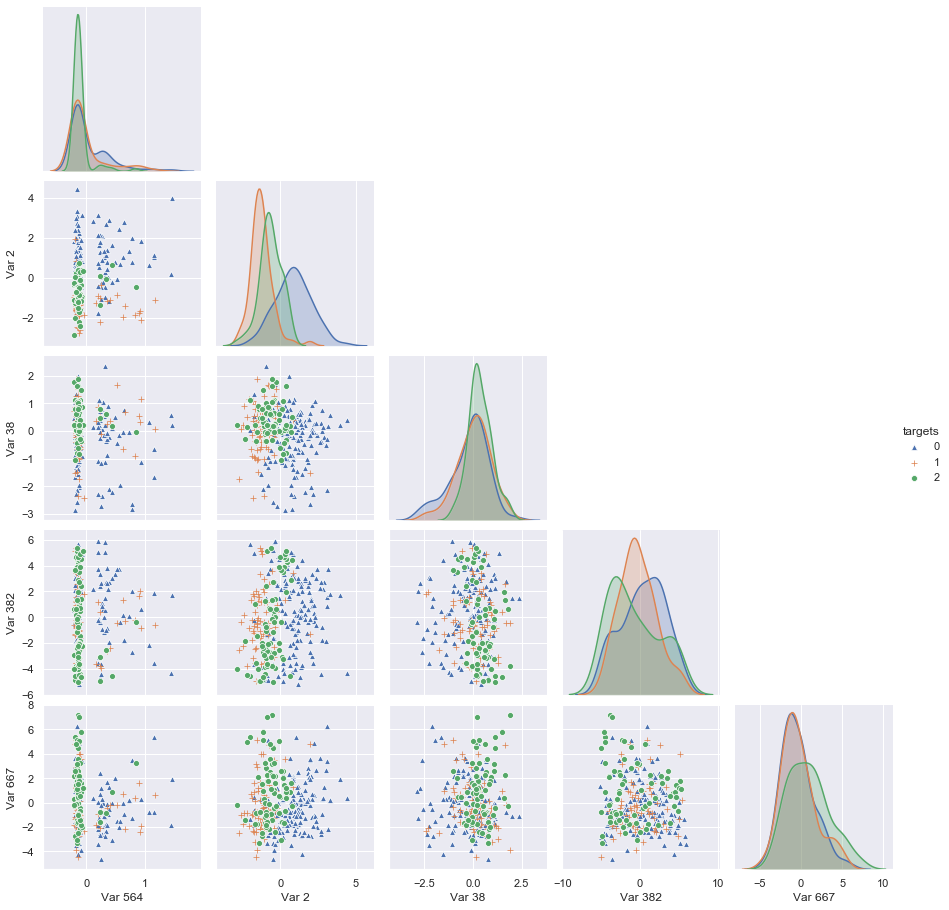

In [191]:
arbitrary_features = X_df.iloc[:, [563, 1, 37, 381, 666]] 
arbitrary_features.insert(5, 'targets', kmean_labels)
sns.pairplot(arbitrary_features, hue='targets', markers=['^', '+', 'o'], corner=True)
plt.savefig('arbitrary important features ex2')